In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
medcost_df = pd.read_csv("medical_cost_insurance.csv")
medcost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medcost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medcost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#Dropping sex column as we don't want our model to bias the decisions based on gender
medcost_df.drop(columns = ["sex"], inplace = True)

/var/folders/cc/nm_bw32s3r141jl3ntxgh_kw0000gn/T/ipykernel_21759/3364464460.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medcost_df.corr(), annot = True);


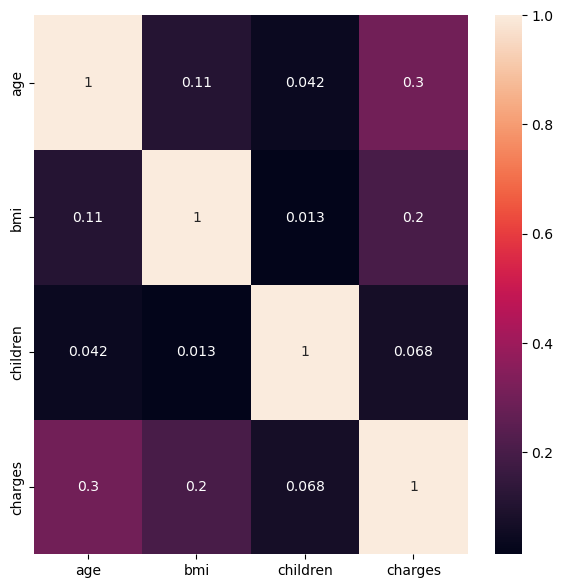

In [11]:
#Correlation among all features
plt.figure(figsize = (7,7))
sns.heatmap(medcost_df.corr(), annot = True);

#### No significant correlation between the features

### Age vs Medical Charges

Text(0.5, 1.0, 'Age vs Charges')

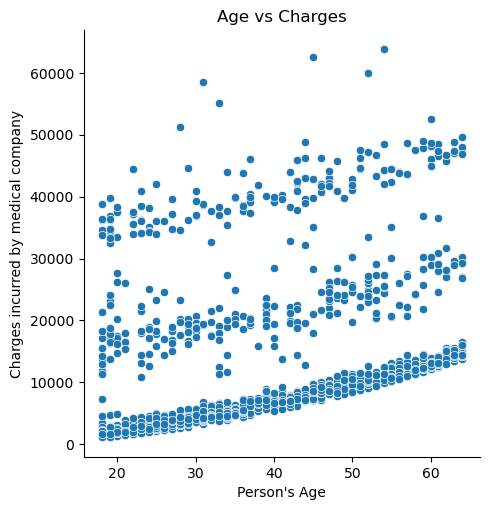

In [13]:
sns.relplot(x = "age", y = "charges", data = medcost_df);
plt.xlabel("Person's Age")
plt.ylabel("Charges incurred by medical company")
plt.title("Age vs Charges")

### Age Distribution

/var/folders/cc/nm_bw32s3r141jl3ntxgh_kw0000gn/T/ipykernel_21759/30511700.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(medcost_df["age"], shade = True);


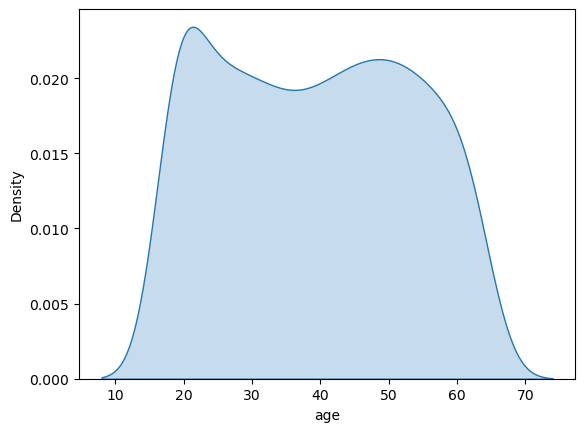

In [14]:
sns.kdeplot(medcost_df["age"], shade = True);

#### Graph shows linear relation between Age and Charges

### Charges Distribution

/var/folders/cc/nm_bw32s3r141jl3ntxgh_kw0000gn/T/ipykernel_21759/3750881142.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(medcost_df["charges"], shade = True);


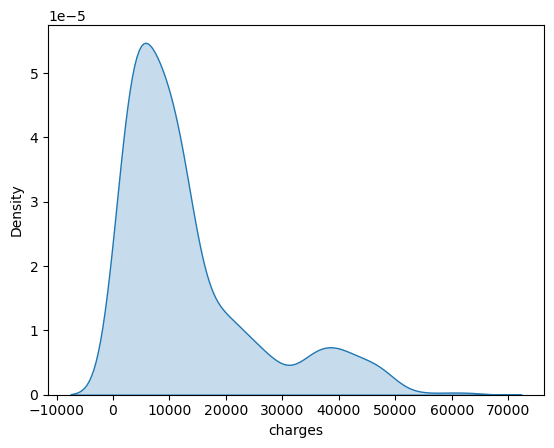

In [15]:
sns.kdeplot(medcost_df["charges"], shade = True);

#### Skewed data, and distribution of charges is around 0-20,000

### Impact of BMI on medical charges

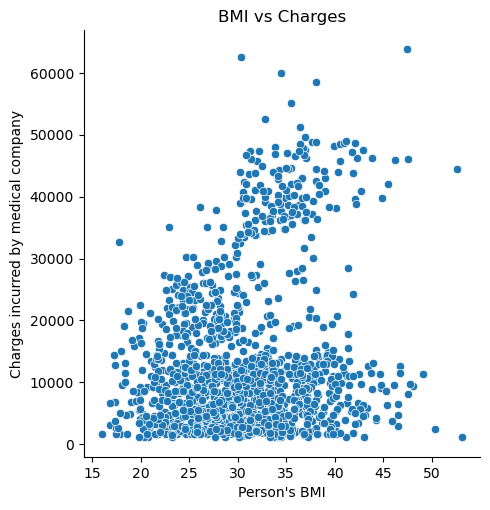

In [16]:
sns.relplot(x = "bmi", y = "charges", data = medcost_df);
plt.xlabel("Person's BMI")
plt.ylabel("Charges incurred by medical company")
plt.title("BMI vs Charges");

#### No significant relation between the two, the graph looks very scattered

### Impact of the Smoker

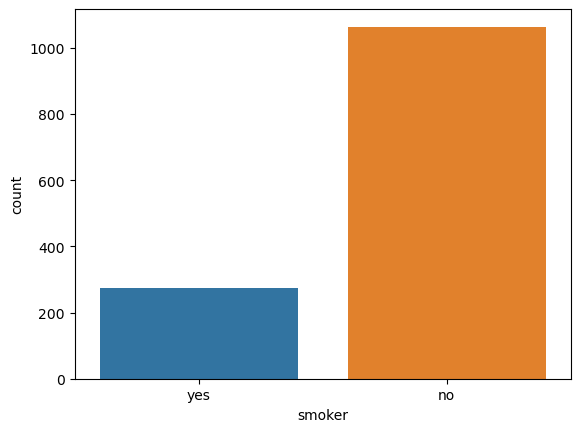

In [18]:
sns.countplot(x = "smoker", data = medcost_df);

#### It's an uneven distribution as some smokers who smoke usually don't tend to reveal

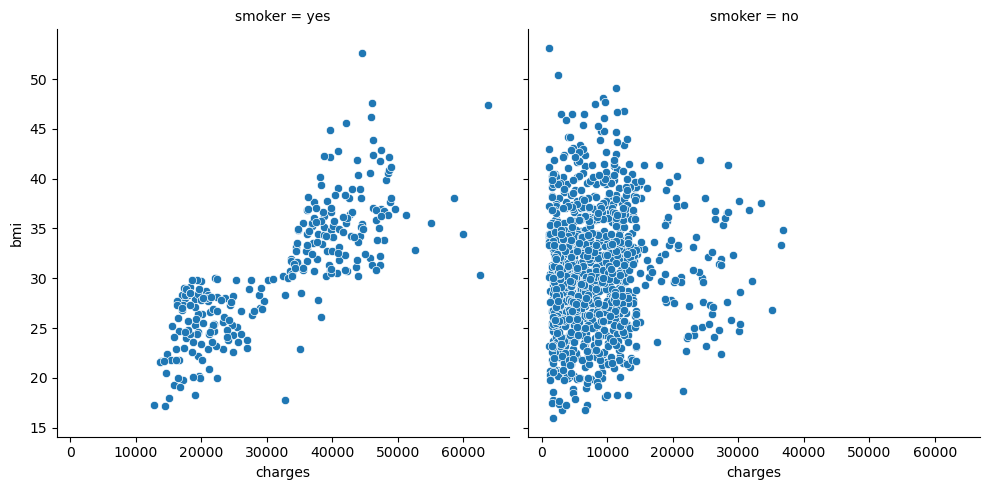

In [19]:
sns.relplot(data = medcost_df, x = 'charges', y = 'bmi', kind = 'scatter', col = 'smoker');

#### Therefore for a smoker - charges increase with increasing BMI and for a non smoker this pattern is not right

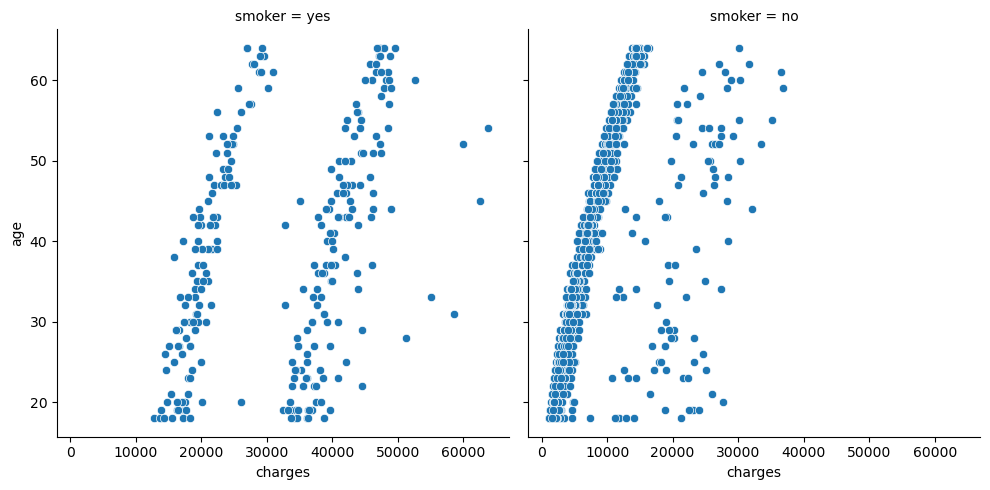

In [20]:
sns.relplot(data = medcost_df, x = 'charges', y = 'age', kind = 'scatter', col = 'smoker');

#### We see a linear relation between charges and age based on whether a person smokes or not

### Impact of Region

#### checking for all regions

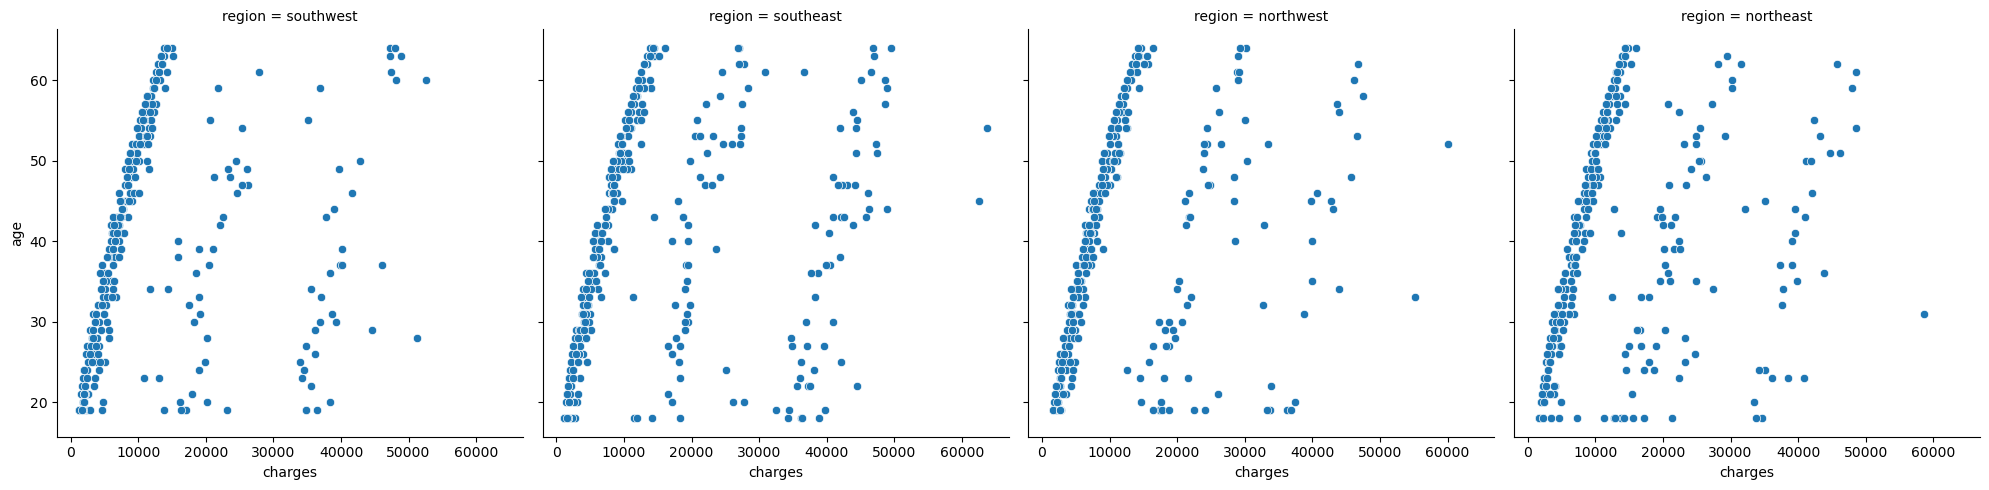

In [21]:
sns.relplot(data = medcost_df, x = 'charges', y = 'age', kind = 'scatter', col = 'region');

#### Therefore all regions have same pattern  - no change in pattern due to age

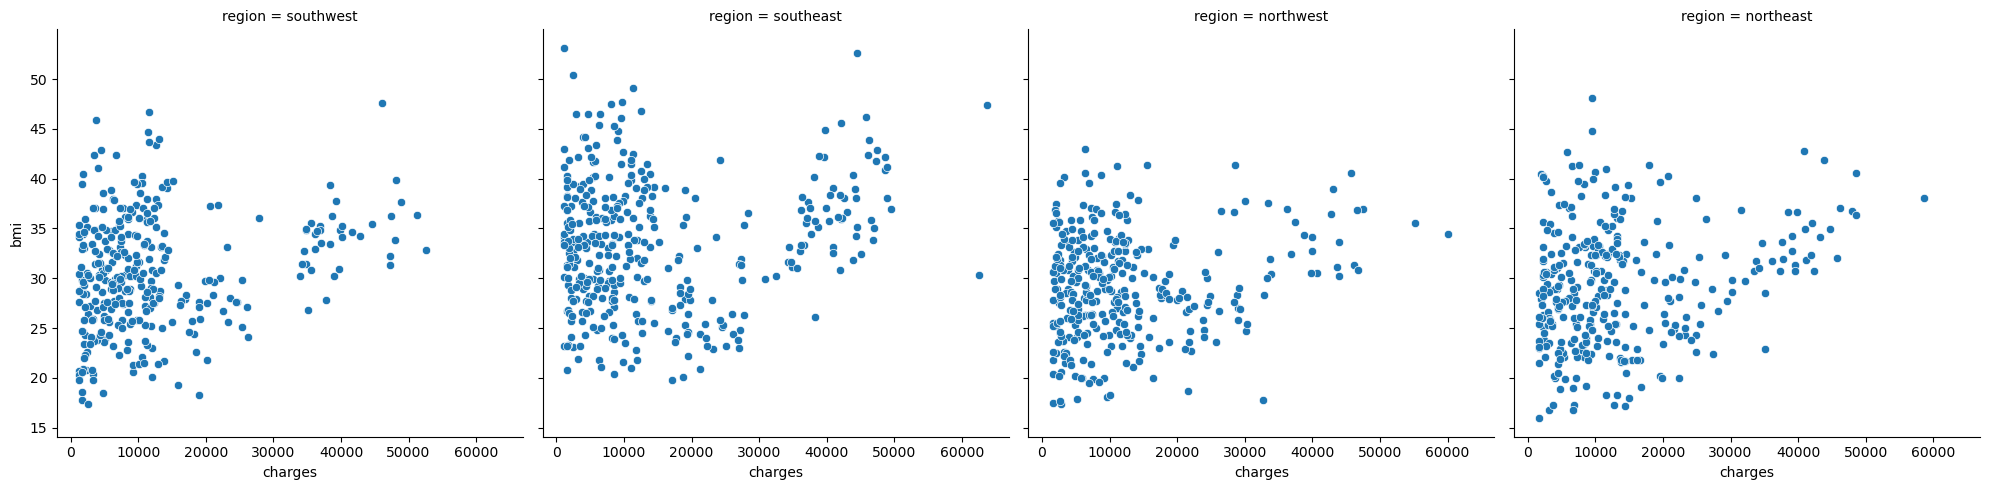

In [22]:
sns.relplot(data = medcost_df, x = 'charges', y = 'bmi', kind = 'scatter', col = 'region')

#### Therefore no change in pattern due to BMI as well

### Charges for smoker and non-smoker

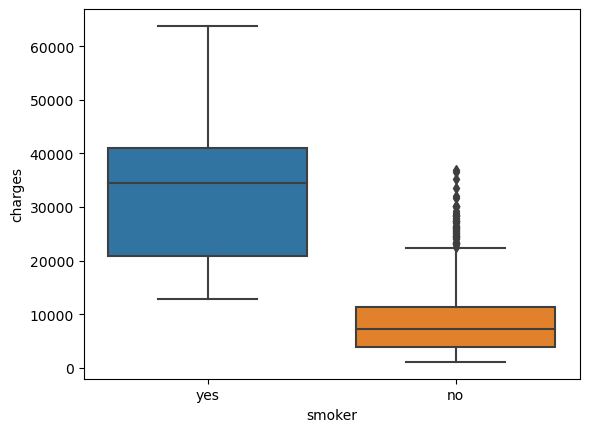

In [29]:
sns.boxplot(y = "charges", x = "smoker", data = medcost_df);

#### From the plot above we can see that - charges for smokers are comparitively too high when compared to non-smokers

### Preparing data for model training

#### Dropping the region column

In [ ]:
medcost_df.drop(columns = ["region"], inplace = True)
print("Columns left after dropping ", list(medcost_df.columns))

In [34]:
#Seperating target and feature column
train_cols = list(medcost_df.columns[1:-1])
print(train_cols)

['bmi', 'children', 'smoker']


In [35]:
target_col = "charges"

In [36]:
# Creating train input and train target dataset
train_inputs = medical_df[train_cols]
train_target = medical_df[target_col]

print("Shape of train inputs ", train_inputs.shape)
print("Shape of train target ", train_target.shape)

Shape of train inputs  (1338, 3)
Shape of train target  (1338,)


#### Encoding smoker column

In [44]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(medcost_df[["smoker"]]) 
encoded_data = encoder.transform(medcost_df[["smoker"]])

categories = encoder.categories_
feature_names = [f"smoker_{cat}" for cat in categories[0]]

encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

train_inputs = pd.concat([train_inputs, encoded_df], axis=1)

/Users/nafeesahussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/33/cb/0e41fad5b30fd66925e47952ddc720d078bdfd8397584a4873ec1cf590ca/scikit_learn-1.3.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 1.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [52]:
print("Columns for trainining inputs ", train_inputs.columns)

Columns for trainining inputs  Index(['bmi', 'children', 'smoker_no', 'smoker_yes'], dtype='object')


#### Splitting the train and test data

In [ ]:
train_inputs.drop(columns = ["smoker"], inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_target, test_size = 0.2, random_state = 42, stratify = medcost_df["smoker"])

In [ ]:
print("Shape of training dataset ", X_train.shape)
print("Shape of test dataset ", X_test.shape)

In [ ]:
train_smoker_counts = list(X_train["smoker"].value_counts())
print(train_smoker_counts)
print("Percentage of smoker in train dataset = ", (train_smoker_counts[1] / sum(train_smoker_counts))*100, "%")
print("Percentage of non-smoker in train dataset ", (train_smoker_counts[0] / sum(train_smoker_counts))*100, "%")

In [ ]:
test_smoker_counts = list(X_test["smoker"].value_counts())
print(test_smoker_counts)
print("Percentage of smoker in test dataset = ", (test_smoker_counts[1] / sum(test_smoker_counts))*100, "%")
print("Percentage of non-smoker in test dataset ", (test_smoker_counts[0] / sum(test_smoker_counts))*100, "%")

In [ ]:
X_train.drop(columns = ["smoker"], inplace = True)
X_test.drop(columns = ["smoker"], inplace = True)

### DecisionTreeRegressor model training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

#### Model evaluation for the training data

In [ ]:
train_prediction = tree.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE(train) = ", mean_absolute_error(y_train, train_prediction))
print("MSE (train) = ", mean_squared_error(y_train, train_prediction))
print("RMSE(train) = ", np.log(np.sqrt(mean_squared_error(y_train, train_prediction))))

In [ ]:
print("Depth of the decision tree", tree.tree_.max_depth)

#### Model evaluation for test data

In [ ]:
test_prediction = tree.predict(X_test)

In [ ]:
print("MAE(test) = ", mean_absolute_error(y_test, test_prediction))
print("MSE(test) = ", mean_squared_error(y_test, test_prediction))
print("RMSE(test) = ", np.log(np.sqrt(mean_squared_error(y_test, test_prediction))))

### DecisionTreeRegressor model training with hyperparameters

In [ ]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X_train, y_train)

#### Model eval on train data

In [ ]:
train_prediction = tree.predict(X_train)

In [ ]:
print("MSE (train) = ", mean_squared_error(y_train, train_prediction))
print("MAE (train) = ", mean_absolute_error(y_train, train_prediction))
print("RMSE (train) = ", np.log(np.sqrt(mean_squared_error(y_train, train_prediction))))

#### Model eval on test data

In [ ]:
test_prediction = tree.predict(X_test)

In [ ]:
print("MSE (test) = ", mean_squared_error(y_test, test_prediction))
print("MAE (test) = ", mean_absolute_error(y_test, test_prediction))
print("RMSE (test) = ", np.log(np.sqrt(mean_squared_error(y_test, test_prediction))))

#### Therefore DecisionTreeRegressor performed better with lesser values of MAE, MSE and RMSE compared to DecisionTreeRegressor with max_depth of 5